# <center>NYU CSCI-UA 9473 Intro to Machine Learning
## <center>Additional Note on LASSO and RIDGE</center>
<center>Augustin Cosse</center>
    
This short note compares the effects of $\ell_1$ (LASSO) and $\ell_2$ (Ridge) regularization on a simple linear regression problem. In particular it illustrates why $\ell_1$ minimization is more efficient at performing feature selection (i.e returning zero coefficients). 

### Part I comparison of the weights returned for various data misfit

#### I.1 Ridge

We start by displaying a set of $(\beta_0, \beta_1)$ pairs, solutions to the problem 
$$\min_{\boldsymbol \beta} \sum_{i=1}^N \left(t^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right)^2 + \lambda \sum_{j=0}^1 |\beta_j|^2$$ 
where $t^{(i)}$ are generated as $t^{(i)} = \beta_0+\beta_1x^{(i)} + \varepsilon^{(i)}$
all around the origin. You can play with the value of $\lambda$ and $\varepsilon$ below to see how this affects the distribution of all $(\beta_0, \beta_1)$ solutions

In [6]:
import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))
anglevec = np.linspace(0,2*np.pi,50)
radius = 1


i=0
ridgeSolution = np.zeros((2, len(anglevec)))


# change the value of lbda to control the distortion of the circle below
lbda = 0.6

for angle in anglevec:
    
    beta0 = radius*np.cos(angle)
    beta1 = radius*np.sin(angle)
    
    beta = np.array([beta0, beta1], dtype="object")
    
    target = np.dot(beta, np.array([1, x],dtype="object"))
   
    # adding some noise
    
    noise = np.random.normal(0,.01,target.shape)
    target_noisy = target + noise

    tmp = np.linalg.inv(
        np.dot(XTildematrix.T, XTildematrix) + lbda*np.identity(2))
    ridgeSolution[:,i] = np.dot(tmp,np.dot(XTildematrix.T,target_noisy))
    
    i+=1


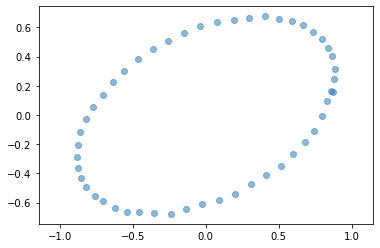

In [16]:
import matplotlib.pyplot as plt

# Note how the circle gets distorted from the choice of the regularization 
# parameter lbda

fig = plt.figure()
ax = fig.add_subplot(111)


plt.scatter(ridgeSolution[0,:], ridgeSolution[1,:], alpha=0.5)
plt.axis("equal")

plt.show()


#### I.2 LASSO

We do the same with the LASSO penalty. Here we generate the pairs $(\beta_0, \beta_1)$ so that they are located all around the origin and are solutions to the problem

$$\min_{\boldsymbol \beta} \sum_{i=1}^N \left(t^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right)^2 + \lambda \sum_{j=0}^1 |\beta_j|$$

where $t^{(i)}$ are generated as $t^{(i)} = \beta_0+\beta_1x^{(i)} + \varepsilon^{(i)}$
all around the origin. Again, you can play with the value of $\lambda$ and $\varepsilon$ below to see how this affects the distribution of all $(\beta_0, \beta_1)$ solutions

In [9]:
import numpy as np

from sklearn import linear_model


# same idea with ridge


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))
anglevec = np.linspace(0,2*np.pi,100)
radius = 1


i=0
lassoSolution = np.zeros((2, len(anglevec)))


lbda = 0.06

for angle in anglevec:
    
    beta0 = radius*np.cos(angle)
    beta1 = radius*np.sin(angle)
    
    beta = np.array([beta0, beta1], dtype="object")
    
    target = np.dot(beta, np.array([1, x],dtype="object"))
   
    # adding some noise
    
    noise = np.random.normal(0,.01,target.shape)
    target_noisy = target + noise

    clf = linear_model.Lasso(alpha=lbda)
    clf.fit(x.reshape(-1,1), target_noisy.reshape(-1,1)) 
    
    lassoSolution[:,i] = np.squeeze(np.array([clf.intercept_, clf.coef_ ],dtype="object"))
    
    i+=1


From the distribution of those solutions, you can already see that unlike the Ridge formulation, the pairs $(\beta_0, \beta_1)$ will not be distributed uniformly around the origin but many of them (as we require the pairs to be solutions to the LASSO objective) will have one of their components ($\beta_0$ or $\beta_1$) set to $0$.

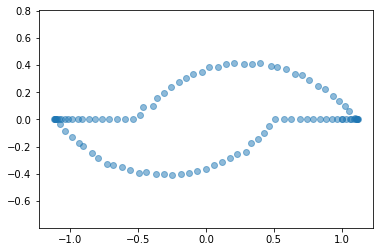

In [17]:
import matplotlib.pyplot as plt
from __future__ import division

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(lassoSolution[0,:], lassoSolution[1,:], alpha=0.5)
plt.axis("equal")

plt.show()


### Part II. Geometric intuition

So far we have see how the distribution of pairs $(\beta_0,\beta_1)$ varies from one regularization approach to the other. We haven't provided much intuition for why there is such an increase in 'sparse' $(\beta_0,\beta_1)$ pairs when switching from Ridge to LASSO. What we can do to get some intuition is to draw the level lines of the data misfit $\sum_{i=1}^N \left(t^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right)^2$ on the one hand, and the level lines of the Ridge (resp. LASSO) penalty on the other. The solution of the minimization 

$$\min_{\boldsymbol \beta} \sum_{i=1}^N \left(t^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right)^2 + \lambda \sum_{j=0}^1 |\beta_j|^2$$

and 

$$\min_{\boldsymbol \beta} \sum_{i=1}^N \left(t^{(i)} - (\beta_0 + \beta_1 x^{(i)})\right)^2 + \lambda \sum_{j=0}^1 |\beta_j|$$

will be given by the intersection of the curves.

#### II.1 Geometric intersection between the data misfit and the $\ell_1$ ball

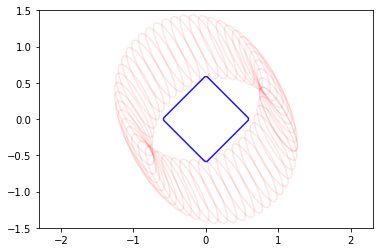

In [15]:
# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)


for angle in anglevec:
    
    beta0 = radius*np.cos(angle)
    beta1 = radius*np.sin(angle)
    
    beta = np.array([beta0, beta1], dtype="object")
    
    target = np.dot(beta, np.array([1, x],dtype="object"))
   
    # adding some noise
    
    noise = np.random.normal(0,.0,target.shape)
    target_noisy = target + noise
    

    costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
                                                          np.expand_dims(target_noisy, axis=1).T))**2, axis=1)

    plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.2], colors='red', alpha=0.1);

    
    
    
l1ballfunction = np.abs(xx) + np.abs(yy)
    
plt.contour(xx, yy, l1ballfunction, [0.6], colors='blue', alpha=0.9);
plt.axis("equal")

plt.show()

To understand why the LASSO formulation is better at feature selection, we can focus on a couple of parabolas and look at the evolution of the intersection between the parabola and $\ell_1$ ball as a function of the angle. 

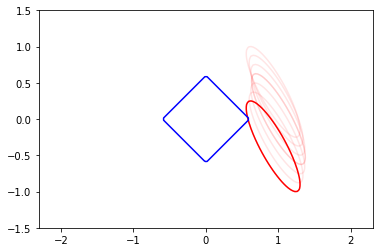

In [14]:
# extending the parabolas 

# selecting the angles corresponding to zero coefficients 
# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.4], colors='red', alpha=0.1);
    
        
        if i==4:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.4], colors='red');
        i+=1
    
    
    
l1ballfunction = np.abs(xx) + np.abs(yy)
    
plt.contour(xx, yy, l1ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



For the first parabola, you can see that the intersection occurs at the (spiky) tip of the $\ell_1$ ball. The solution returned in this case will thus have one weight set to $0$. Let us now take the second parabola.

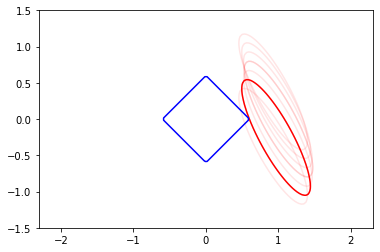

In [20]:
# extending the parabolas 

# selecting the angles corresponding to zero coefficients 



# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.65], colors='red', alpha=0.1);
        if i==5:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.65], colors='red');
        i+=1

        
    
    
    
    
l1ballfunction = np.abs(xx) + np.abs(yy)
    
plt.contour(xx, yy, l1ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



For this second parabola, we see once again, that because of the structure of the LASSO penalty, the intersection occurs on the axis. The solution will againn have a zero coefficient. 

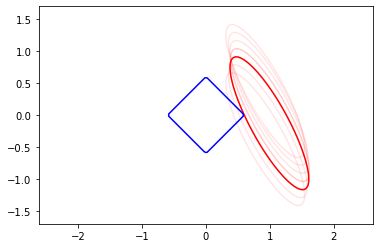

In [21]:
#extending the parabolas 

# selecting the angles corresponding to zero coefficients 



# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.7,1.7,100),np.linspace(-1.7,1.7,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [1.1], colors='red', alpha=0.1);
    
        if i == 6:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [1.1], colors='red');

        i+=1
    
    
    
l1ballfunction = np.abs(xx) + np.abs(yy)
    
plt.contour(xx, yy, l1ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



For the third parabola, we observe the same phenomenon. Because of the "spiky" structure of the ball. The parabola hits the tip of the blue ball first.

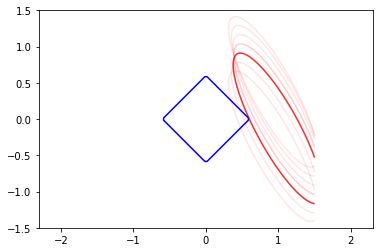

In [32]:
#extending the parabolas 

# selecting the angles corresponding to zero coefficients 



# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [1.1], colors='red', alpha=0.1);
    
        if i == 6:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [1.1], colors='red', alpha=0.8);

        
        i+=1
    
    
    
l1ballfunction = np.abs(xx) + np.abs(yy)
    
plt.contour(xx, yy, l1ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



For this last example above, we see that the parabola hits the tip of the ball again

#### II.2 Geometric intersection between the data misfit and the $\ell_2$ ball

We apply the same approach to the $\ell_2$ ball and study when a parabola generated at a particular angle around the origin hits the $\ell_2$ ball corresponding to the 'Ridge' penalty.

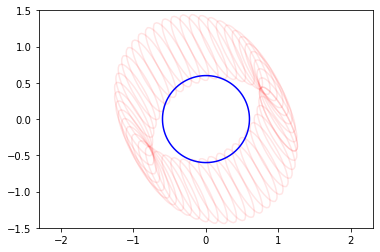

In [34]:
# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)


for angle in anglevec:
    
    beta0 = radius*np.cos(angle)
    beta1 = radius*np.sin(angle)
    
    beta = np.array([beta0, beta1], dtype="object")
    
    target = np.dot(beta, np.array([1, x],dtype="object"))
   
    # adding some noise
    
    noise = np.random.normal(0,.0,target.shape)
    target_noisy = target + noise
    

    costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
                                                          np.expand_dims(target_noisy, axis=1).T))**2, axis=1)

    plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.2], colors='red', alpha = 0.1);

    
    
    
l2ballfunction = np.sqrt(np.abs(xx)**2 + np.abs(yy)**2)
    
plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()

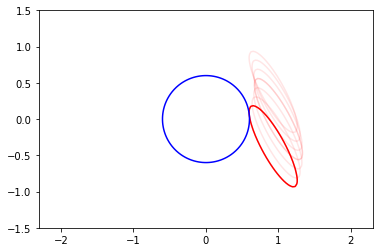

In [35]:
# extending the parabolas 

# selecting the angles corresponding to zero coefficients 



# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.32], colors='red', alpha=0.1);
    
        
        if i==4:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.32], colors='red');
            tt0 = target_noisy
        i+=1
    
    
    
l2ballfunction = np.sqrt(np.abs(xx)**2 + np.abs(yy)**2)
    
plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()


In [36]:
beta1 = np.linspace(-0.6, 0.6,100)
beta0 = np.sqrt(abs((0.6)**2 -beta1**2))
betaTest = np.hstack((beta1.reshape(-1,1), beta0.reshape(-1,1)))


objective = np.sum((np.dot(XTildematrix,betaTest.T) - np.matmul(tt0.reshape(-1,1),np.ones((1, len(betaTest)))))**2, axis = 0 )

minBeta1_1 = beta1[np.argmin(objective)]
minBeta0_1 = np.sqrt(abs(0.6**2 - minBeta1_1**2))



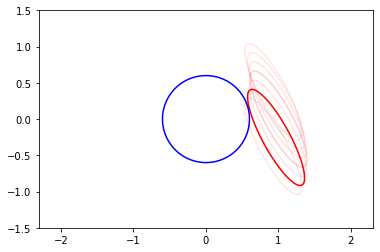

In [39]:
# extending the parabolas 

# selecting the angles corresponding to zero coefficients 
# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.45], colors='red', alpha=0.1);
        if i==5:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.45], colors='red');
            tt1 = target_noisy
        i+=1

        
    
    
    
    
l2ballfunction = np.sqrt(np.abs(xx)**2 + np.abs(yy)**2)
    
plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



In [40]:
beta1 = np.linspace(-0.6, 0.6,100)
beta0 = np.sqrt(abs((0.6)**2 -beta1**2))
betaTest = np.hstack((beta1.reshape(-1,1), beta0.reshape(-1,1)))


objective = np.sum((np.dot(XTildematrix,betaTest.T) - np.matmul(tt1.reshape(-1,1),np.ones((1, len(betaTest)))))**2, axis=0 )

minBeta1_2 = beta1[np.argmin(objective)]
minBeta0_2 = np.sqrt(abs(0.6**2 - minBeta1_2**2))



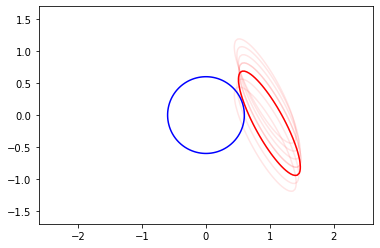

In [41]:
#extending the parabolas 

# selecting the angles corresponding to zero coefficients 



# plotting the level lines 

import numpy as np


x = np.linspace(0,1,10)

XTildematrix = np.hstack((np.ones(np.shape(x.reshape(-1,1))), x.reshape(-1,1)))


anglevec = np.linspace(0,2*np.pi,50)

radius = 1


i=0


xx, yy = np.meshgrid(np.linspace(-1.7,1.7,100),np.linspace(-1.7,1.7,100))


betaMat = np.hstack((xx.flatten().reshape(-1,1), yy.flatten().reshape(-1,1)))

fig = plt.figure()
ax = fig.add_subplot(111)

i=0

for angle in anglevec:
    
    
    if  ((angle<np.pi/8) or (angle> 2*np.pi - np.pi/8) ):
                
        beta0 = radius*np.cos(angle)
        beta1 = radius*np.sin(angle)

        beta = np.array([beta0, beta1], dtype="object")

        target = np.dot(beta, np.array([1, x],dtype="object"))

        # adding some noise

        noise = np.random.normal(0,.0,target.shape)
        target_noisy = target + noise


        costfun = np.sum((np.dot(betaMat,XTildematrix.T) - np.matmul(np.ones((len(xx.flatten()),1)),
         
                                                                     np.expand_dims(target_noisy, axis=1).T))**2, axis=1)
        
        plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.68], colors='red', alpha=0.1);
    
        if i == 6:
            plt.contour(xx, yy, np.reshape(costfun,np.shape(xx)), [0.68], colors='red');
            tt2 = target_noisy
        i+=1
    
    
l2ballfunction = np.sqrt(np.abs(xx)**2 + np.abs(yy)**2)
    
plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.axis("equal")

plt.show()



In [42]:
beta1 = np.linspace(-0.6, 0.6,100)
beta0 = np.sqrt(abs((0.6)**2 -beta1**2))
betaTest = np.hstack((beta1.reshape(-1,1), beta0.reshape(-1,1)))


objective = np.sum((np.dot(XTildematrix,betaTest.T) - np.matmul(tt2.reshape(-1,1),np.ones((1, len(betaTest)))))**2, axis=0)

minBeta1_3 = beta1[np.argmin(objective)]
minBeta0_3 = np.sqrt(abs(0.6**2 - minBeta1_3**2))



We can now plot each of the intersections on the circle to study which of the pairs $(\beta_0, \beta_1)$ will have a zero weight.

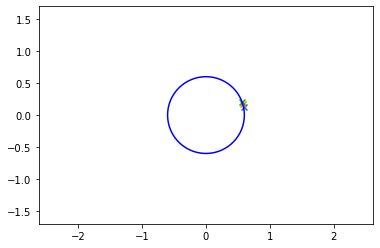

In [47]:
plt.scatter(minBeta1_1, minBeta0_1, marker='x')
plt.scatter(minBeta1_2, minBeta0_2, marker='x')
plt.scatter(minBeta1_3, minBeta0_3, marker='x')
plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.axis("equal")
plt.show()

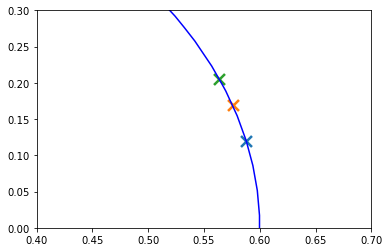

In [61]:
plt.scatter(minBeta1_1, minBeta0_1,marker='x', s= 120,linewidths=2.5)
plt.scatter(minBeta1_2, minBeta0_2,marker='x', s= 120,linewidths=2.5)
plt.scatter(minBeta1_3, minBeta0_3,marker='x', s= 120,linewidths=2.5)

xx, yy = np.meshgrid(np.linspace(-1.7,1.7,100),np.linspace(-1.7,1.7,100))

l2ballfunction = np.sqrt(np.abs(xx)**2 + np.abs(yy)**2)

plt.contour(xx, yy, l2ballfunction, [0.6], colors='blue');
plt.xlim((0.4,0.7))
plt.ylim((0,0.3))
plt.show()



In this case, you see that because of the 'smooth' structure of the $\ell_2$ norm (vs the $\ell_1$ which is much more spiky near the axes), a small change in the angle of the ellipsoid, leads to a small change in the intersection between the circle and the parabola, and hence to a small displacement of the solution along the circle. Even the first parabola was intersecting the circle on the axis, the next one already has a distinct intersection.